In [1]:
import tensorflow as tf
import numpy as np
import torch.optim as optim
import pandas as pd
import glob
from glob import glob
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
dataset_dir='/content/drive/MyDrive/Documents/SClab/Assignment-1/imagery'
CLASS = [x.split("/")[-1] for x in glob(dataset_dir+'/*')]

In [4]:
import cv2
import os
train_images = []
def load_images_from_folder(folder,label):
   
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        resized_img = cv2.resize(img, (48, 48))
        if img is not None:
            train_images.append([resized_img,label])
   
for classes in CLASS:
    folder=os.path.join(dataset_dir,classes) 
    load_images_from_folder(folder,classes)    

In [5]:
x=[]
y=[]
for item in train_images:
    x.append(item[0])
    y.append(item[1])
x=np.array(x)
y=np.array(y)


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)
y=tf.keras.utils.to_categorical(y)

In [7]:
 x_new=[]
 for item in x:
   x_new.append(item.ravel())
 x_new=np.array(x_new)   
 x_new.shape[1]

6912

In [19]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2, random_state = 0)

In [9]:
X_train.shape

(3585, 6912)

Neural Network

In [22]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
# Initializing the ANN
ann = tf.keras.models.Sequential()

# Adding the input layer 
ann.add(tf.keras.layers.Dense(units=100, activation='relu',input_shape=(6912,)))
ann.add(Dropout(0.5))
# Adding the first hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.4))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.4))
# Adding the third hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.4))
# Adding the four hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.4))
# Adding the fifth hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann.add(Dropout(0.3))
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Part 3 - Training the ANN

# Compiling the ANN
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
ann.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
hist=ann.fit(X_train, y_train, batch_size = 20, epochs = 100)

# Predicting the Test set results
accuracy=ann.evaluate(X_test,y_test)[1]
print(accuracy)

Epoch 1/100
180/180 [==============================] - 2s 7ms/step - loss: 15.5981 - accuracy: 0.6377
Epoch 2/100
180/180 [==============================] - 1s 7ms/step - loss: 1.0401 - accuracy: 0.6644
Epoch 3/100
180/180 [==============================] - 1s 7ms/step - loss: 1.1572 - accuracy: 0.6650
Epoch 4/100
180/180 [==============================] - 1s 7ms/step - loss: 1.0984 - accuracy: 0.6664
Epoch 5/100
180/180 [==============================] - 1s 7ms/step - loss: 1.0753 - accuracy: 0.6647
Epoch 6/100
180/180 [==============================] - 1s 7ms/step - loss: 0.9702 - accuracy: 0.6644
Epoch 7/100
180/180 [==============================] - 1s 7ms/step - loss: 1.0377 - accuracy: 0.6653
Epoch 8/100
180/180 [==============================] - 1s 8ms/step - loss: 0.9444 - accuracy: 0.6653
Epoch 9/100
180/180 [==============================] - 1s 7ms/step - loss: 1.4667 - accuracy: 0.6647
Epoch 10/100
180/180 [==============================] - 1s 7ms/step - loss: 1.3458 - accur

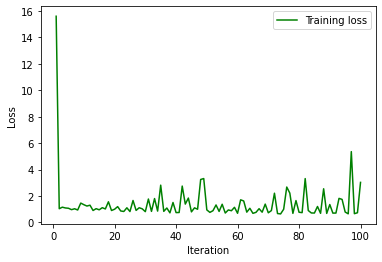

In [24]:
import matplotlib.pyplot as plt
loss_train = hist.history['loss']
Iteration = range(1,101)
plt.plot(Iteration, loss_train, 'g', label='Training loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()

CNN

In [25]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[48, 48, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=150, activation='relu'))
cnn.add(Dropout(0.2))
cnn.add(tf.keras.layers.Dense(units=150, activation='relu'))
cnn.add(Dropout(0.2))


# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=4, activation='softmax'))

# Part 3 - Training the CNN

# Compiling the CNN
optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001)
cnn.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history=cnn.fit(X_train,y_train,
                  steps_per_epoch = 20,
                  epochs = 25)
# Predicting the Test set results
accuracy=cnn.evaluate(X_test,y_test)[1]
print(accuracy)

Epoch 1/25
20/20 [==============================] - 1s 24ms/step - loss: 3.2257 - accuracy: 0.6290
Epoch 2/25
20/20 [==============================] - 0s 20ms/step - loss: 1.5331 - accuracy: 0.7216
Epoch 3/25
20/20 [==============================] - 0s 20ms/step - loss: 1.2176 - accuracy: 0.7529
Epoch 4/25
20/20 [==============================] - 0s 20ms/step - loss: 1.0275 - accuracy: 0.7609
Epoch 5/25
20/20 [==============================] - 0s 20ms/step - loss: 0.8890 - accuracy: 0.7729
Epoch 6/25
20/20 [==============================] - 0s 20ms/step - loss: 0.7800 - accuracy: 0.7886
Epoch 7/25
20/20 [==============================] - 0s 20ms/step - loss: 0.7306 - accuracy: 0.7953
Epoch 8/25
20/20 [==============================] - 0s 20ms/step - loss: 0.6732 - accuracy: 0.8039
Epoch 9/25
20/20 [==============================] - 0s 20ms/step - loss: 0.5993 - accuracy: 0.8095
Epoch 10/25
20/20 [==============================] - 0s 20ms/step - loss: 0.5384 - accuracy: 0.8212
Epoch 11/

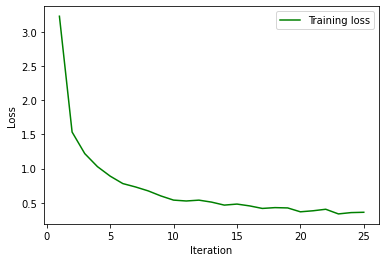

In [27]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
Iteration = range(1,26)
plt.plot(Iteration, loss_train, 'g', label='Training loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()